# K-means do 0: heurística para problema do agrupamento

### Entradas: 
####                    - vetor de dimensão n com m entradas (X)
####                    - número de grupos (k)
####                    - k vetores representativos de X (Z)

### Saida: 
####                    - vetor com a classificação/ rotulação de cada ponto de X (C)

## Importando principais bibliotecas para a execução do projeto

In [578]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import *
from numpy.random import rand, randint, seed
from numpy.linalg import norm

In [579]:
import warnings
warnings.filterwarnings('ignore')

## Gerando pontos para aplicar k-means

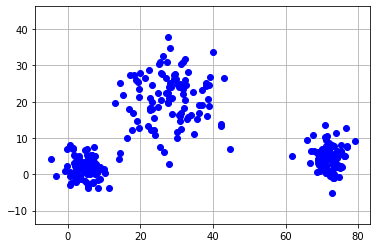

In [580]:
seed(21)
n = 2    # dimensão dos vetores
m = 300  # número de vetores
k = 3    # número de grupos

# Criando um X sintético
max_dist_origem = 100
max_raio = 10
mk = int(floor(m/k)) # vou fazer cada grupo ter m/k vetores

centros = max_dist_origem * rand(n,k)
raios = max_raio * rand(k)
X = random.randn(m, n)

for i in range(k):
    X[i*mk : (i+1)*mk, :] = X[i*mk : (i+1)*mk, :]*raios[i] + centros[:,i].reshape((1,n))
    
aa=plt.grid();
aa=plt.axis('equal');
for i in range(m):
    aa=plt.plot(X[i,0],X[i,1],'bo');

- Vale lembrar que a título de simplificação, o X sintético é gerado já pensando em pontos que estão razoavelmente concentrados em k grupos, pois o foco deste trabalho é criação e execução do algoritmo k-means.

# Primeiro input do Z (aleatorio) para criar o C

In [581]:
def calcula_Z_aleatorio(X, k):

    Z = []
    Z_i = []

    while len(Z_i) != k:

        r = randint(0, len(X))

        if r not in Z_i:
            Z_i.append(r)
    
    for i in arange(k):
        Z.append(X[Z_i][i])
        
    return Z

- Como veremos adiante, para aplicar o k-menas é preciso de uma entrada de Zi vetores representativos, os quais neste trabalho serão escolhidos de forma aleatória.

# Calculando C, dado Z

In [582]:
from numpy.linalg import norm
from numpy import argmin

def calcula_C_dado_Z(Z, X, k, m):
    
    C = zeros(len(X))
    
    for j in range(len(X)):
        distancias_xj_zi = []
        for i in range(k):
            distancias_xj_zi.append(norm(X[j] - Z[i]))
        C[j] = argmin(distancias_xj_zi)
    
    return C

# Calculando Z, dado C 

In [583]:
def calcula_Z_dado_C(C, X, k, m):
    
    Z = []
    for i in range(k):
        cont = 0
        
        zi = zeros([k, len(X[0])])
        for j in range(m):
            if C[j] == i:
                zi[i] += X[j]
                cont += 1

        zi[i] = array(zi[i])
        Z.append(zi[i] / cont)
        
    return Z

# Vizualizando os k-grupos e o zi de cada (configurado para k = 3)

In [584]:
def plota_pontos_k_means(m, C, Z):
    
    aa=plt.grid();
    aa=plt.axis('equal');
    for i in range(m):
        if C[i] == 0:
            aa=plt.plot(X[i,0],X[i,1],'go');
        elif C[i] == 1:
            aa=plt.plot(X[i,0],X[i,1],'ro');
        elif C[i] == 2:
            aa=plt.plot(X[i,0],X[i,1],'yo');
        
    for i in range(len(Z)):
        aa = plt.plot(Z[i][0], Z[i][1], 'bo')

    return aa

# Aplicando o k-means

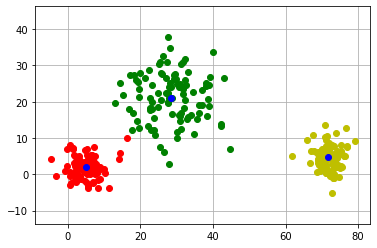

In [585]:
Z0 = calcula_Z_aleatorio(X, k)
C = calcula_C_dado_Z(Z0, X, k, m)

while(True):
    
    Z = calcula_Z_dado_C(C, X, k, m)
    C = calcula_C_dado_Z(Z, X, k, m)
    if all(C == C0):
        break
    C0 = C
        
plota_pontos_k_means(m, C, Z)

In [586]:
print(f'Vetor classificador de cada um dos pontos de X: \n', C)

Vetor classificador de cada um dos pontos de X: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
